# CIS*4020 Assignment 2

## [36 Marks]

## Import libraries

In [109]:
import numpy as np
import matplotlib.pyplot as plt
# You may need some sklearn specific imports, or other standard toolboxes

## Load dataset

In [110]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

In [111]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped



In [112]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


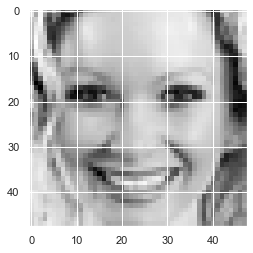

facial emotion: angry
[1. 0. 0. 0. 0. 0. 0.]


In [113]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)
sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[998, :]))
print(y_training[998, :])

### Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

(12045, 48, 48)
(12045, 7)
(1548, 48, 48)
(1548, 7)


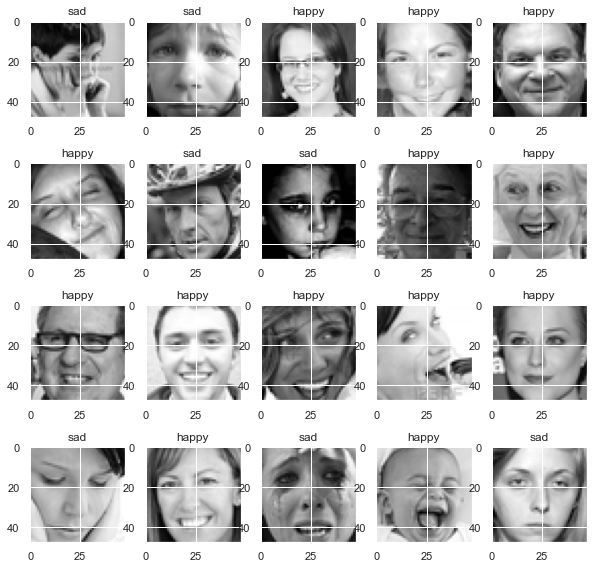

In [135]:
# YOUR CODE HERE
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

#training testingset set containing with only happy/sad faces
newtrainingset = trainingset[(trainingset[:,2307] > 0) | (trainingset[:,2308] > 0)]
newtestingset = testingset[(testingset[:,2307] > 0) | (testingset[:,2308] > 0)]

#split the data into testing training
x_training = newtrainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = newtrainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding 

x_testing = newtestingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = newtestingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)


#show some images
fig=plt.figure(figsize=(10,10))
rows=4
colums=5

for i in range(20):
    sample = x_training[i, :]
    sample = sample.reshape(48, 48)
    ax = plt.subplot(rows,colums,i+1) 
    ax.imshow(sample, cmap='gray')
    ax.set_title(get_emotion(y_training[i, :]))
plt.show() 


[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

The size of data is:
(12045, 2304)


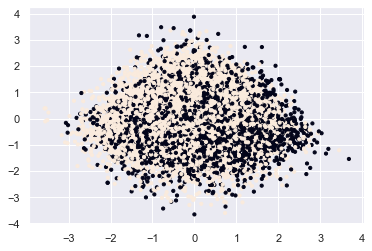


Explained variation per principal component: [0.28554511 0.38530033]


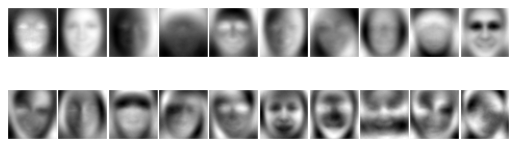

In [115]:
# YOUR CODE HERE
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# n_samples = 12045

nsamples, nx, ny = x_training.shape
d2_train_dataset = x_training.reshape((nsamples,nx*ny))

#happy cases
just_happy_train = y_training[:,3].astype(int)

#size
print("The size of data is:")
print(d2_train_dataset.shape)

#Compute PCA
n_components = 2 #no. of principal components (dimensonality that we want to reduce down to)
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(d2_train_dataset)

# apply PCA transformation
X_train_pca = pca.transform(d2_train_dataset)

#scatter plot PCA
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = just_happy_train, s= 10)
plt.show()

#explained_variance_ratio_ (how significant is each principal component)
print('\nExplained variation per principal component: {}'.format(np.cumsum(pca.explained_variance_ratio_)))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))

#Compute PCA
faces_pca = PCA(n_components=0.95) #Assuming 95% of the variation in the dataset 
faces_pca.fit(d2_train_dataset)

#Draw eignefaces
fig, axes = plt.subplots(2,10,figsize=(9,3),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(48,48),cmap="gray")
    


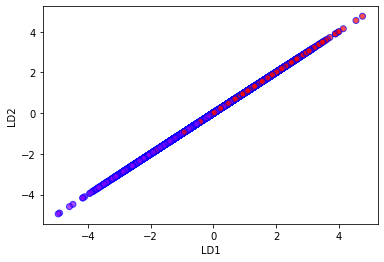

In [8]:
#Compute LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#happy cases
just_happy_train = y_training[:,3].astype(int)

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(d2_train_dataset,just_happy_train)

#scatter plot LDA
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,0],
    c=just_happy_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

# #Draw eignefaces LDA
# fig, axes = plt.subplots(2,10,figsize=(9,3),
# subplot_kw={'xticks':[], 'yticks':[]},
# gridspec_kw=dict(hspace=0.01, wspace=0.01))
# for i, ax in enumerate(axes.flat):
#     ax.imshow(X_lda[i].reshape(48,48),cmap="gray")



[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [116]:
# YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#testing data
nsamples, nx, ny = x_testing.shape
d2_test_dataset = x_testing.reshape((nsamples,nx*ny))

just_happy_test =  y_testing[:,3].astype(int) 

gnb = GaussianNB()
y_pred = gnb.fit(d2_train_dataset, just_happy_train).predict(d2_test_dataset)

accuracy_score(just_happy_test, y_pred)


0.5904392764857881

[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

#select the subset of the data

# standardization of dependent variables
scale= StandardScaler()
scaled_data_train = scale.fit_transform(d2_train_dataset)
scaled_data_test = scale.fit_transform(d2_test_dataset)

x_data_train_sub = scaled_data_train[0:1500,  ]
y_data_train_sub = just_happy_train[0:1500, ]

x_data_test_sub = scaled_data_test[0:1500,  ]
y_data_test_sub = just_happy_test[0:1500, ]

logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(x_data_train_sub, y_data_train_sub)
y_pred = logreg.predict(x_data_test_sub)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_data_test_sub, y_data_test_sub)))


Accuracy of logistic regression classifier on test set: 0.63


[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.


How to increase acuuracy? #LATER

In [118]:
# YOUR CODE HERE

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(x_data_train_sub, y_data_train_sub)

#Predict the response for test dataset
y_pred = clf.predict(x_data_test_sub)

print("Accuracy:",metrics.accuracy_score(y_data_test_sub, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_data_test_sub, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_data_test_sub, y_pred))

Accuracy: 0.6326666666666667
Precision: 0.6796875
Recall: 0.697594501718213


[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

We see that different algorithms behaves different accuracy scores. This does not mean that one algorithm is consistently better than the other ones. Even though certain classification algorithms consistently perform better than others, model performances are typically affected by the use case. Several hyperparameters can also be tuned in different ways within each of these algorithms to yield better accuracy. 

Based on the practice that has been conducted, Naive Bayes is least accurate model where as Logistic Regression and Support vector Machine accuracy is almost same.

naive Bayes: 0.59
Logistic Regression: 0.63
Support Vector Machine: 0.63

- Logistic Regression seems easy, fast and simple classification method. 
- θ parameters explains the direction and intensity of significance of independent variables over the dependent variable.
- Can be used for multiclass classifications also.
- Loss function is always convex.
- Hinge loss in SVM outperforms log loss in LR.
- LR performs better than naive bayes upon colinearity, as naive bayes expects all features to be independent.
- Naive bayes works well with small datasets

Therefore, LR is a fairly good choice and can be trusted. 

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

From the below data we can determine the probability of the happiest/saddest faces in the sample size of 10. For example:
In all the below samples probability of a happy face is more than sad face according to both classifications. Although, the happiest face out of these 10 samples would be sample 1: with probabiliy of being happy = 1 and then 0.99, 0.92, 0.85 etc from most happy to least happy.

Whereas, sample 2 is the saddest face according to logistic regression with a lowest (0) proablity of being happy. Then 0.11 and if we consider more sample we can get a good view but the process would be same to determine.

In [139]:
# YOUR CODE HERE

#Logistic Regression
yprob_lr = logreg.predict_proba(x_data_test_sub)
print("For Logistric Regression: \n",yprob_lr[-8:].round(2))

#Naive Bayes
yprob_nb = gnb.predict_proba(x_data_test_sub)
print("\nFor Naive bayes: \n",yprob_nb[-8:].round(2))


For Logistric Regression: 
 [[0.   1.  ]
 [0.02 0.98]
 [0.02 0.98]
 [0.9  0.1 ]
 [0.01 0.99]
 [0.04 0.96]
 [0.99 0.01]
 [0.55 0.45]]

For Naive bayes: 
 [[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]]


# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

#[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [120]:
#multi class

n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

#convert to 2D
nsamples, nx, ny = x_training.shape
d2_train_multi_dataset = x_training.reshape((nsamples,nx*ny))

Very Less variance, therefore in the below diagram both plots are on top of each other. The way plot starts the color is darker because red is covered by blue

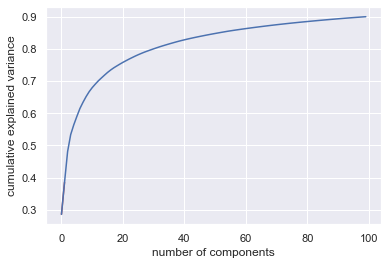

In [121]:
# YOUR CODE HERE

#All classes
multi_pca = PCA(0.95) #Assuming 95% of the variation in the dataset 
multi_pca.fit(d2_train_multi_dataset)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'r')

#Sad/Happy Classes
faces_pca = PCA(n_components=100) 
faces_pca.fit(d2_train_dataset)
plt.plot(np.cumsum(faces_pca.explained_variance_ratio_), 'b')

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


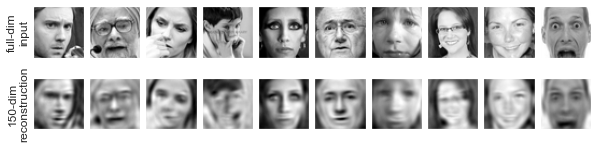

In [122]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as RandomizedPCA

# Compute the components and projected faces
pca = RandomizedPCA(150).fit(d2_train_multi_dataset)
components = pca.transform(d2_train_multi_dataset)
projected = pca.inverse_transform(components)
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(d2_train_multi_dataset[i].reshape(48, 48), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(48, 48), cmap='binary_r')
       
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

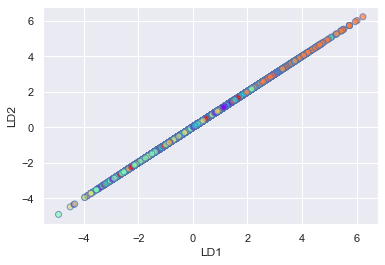

In [123]:
#compute LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

class_labels_train = np.argmax(y_training, axis=1)

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(d2_train_multi_dataset,class_labels_train)

#scatter plot LDA
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,0],
    c=class_labels_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
    

[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [125]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.multiclass import type_of_target
%matplotlib inline
import seaborn as sns; sns.set()

#testing data
nsamples, nx, ny = x_testing.shape
d2_test_multi_dataset = x_testing.reshape((nsamples,nx*ny))

#1D conversion
class_labels_train = np.argmax(y_training, axis=1)
class_labels_test =  np.argmax(y_testing, axis=1)

gnb = GaussianNB().fit(d2_train_multi_dataset, class_labels_train)
gnb_predictions = gnb.predict(d2_test_multi_dataset)

# accuracy on X_test
accuracy = gnb.score(d2_test_multi_dataset, class_labels_test)

print(accuracy)



0.22736138200055725


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE'

My model has a very low accuracy and we can clearly see through the confusion matrix that the model isn't optimal. The sum of true value currently is (20+12+33+143+257+253+98 = 586). The false value/incorrect (non diagonal values are higher). For example the true value for 0 is 20 but 0 was identified as 1 (2 times), as 2 (21 times) etc. Similarly, the true (actual value of 1 is 12) but it was predicted as 2 (36 times) and so on.

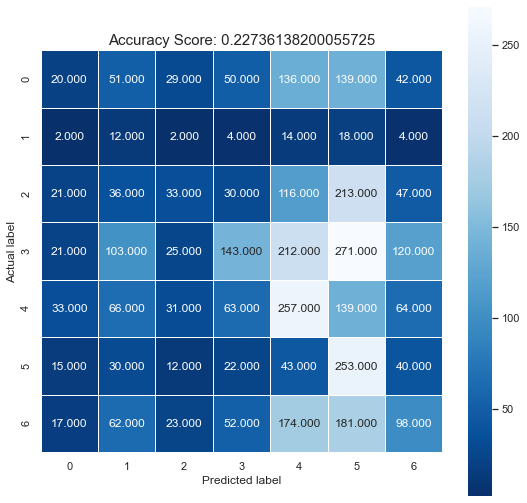

In [126]:
# YOUR CODE HERE

# creating a confusion matrix
cm = confusion_matrix(class_labels_test, gnb_predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

<AxesSubplot:>

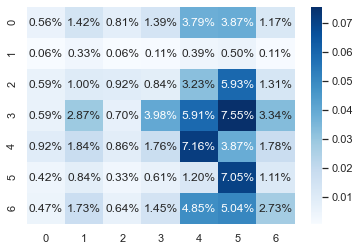

In [127]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [129]:
# YOUR CODE HERE
from sklearn import linear_model

#select the subset of the data

# standardization of dependent variables
scale= StandardScaler()
scaled_data_train = scale.fit_transform(d2_train_multi_dataset)
scaled_data_test = scale.fit_transform(d2_test_multi_dataset)

x_data_train_sub = scaled_data_train[0:1500,  ]
y_data_train_sub = class_labels_train[0:1500, ]

x_data_test_sub = scaled_data_test[0:1500,  ]
y_data_test_sub = class_labels_test[0:1500, ]


lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(x_data_train_sub, y_data_train_sub)

# Use score method to get accuracy of model
score = lm.score(x_data_test_sub, y_data_test_sub)
print(score)


0.264


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

The accuracy is better than before but defintely not optimal. For example, the true value for 5 is 62 but it was predicted as 6 (17 Times) etc.

[[ 29   0  29  58  31  17  37]
 [  7   1   4   3   3   2   3]
 [ 42   0  29  56  30  28  39]
 [ 39   0  40 166  50  14  50]
 [ 35   1  36  47  49  34  49]
 [ 23   0  30  28  21  62  19]
 [ 35   0  35  73  39  17  60]]


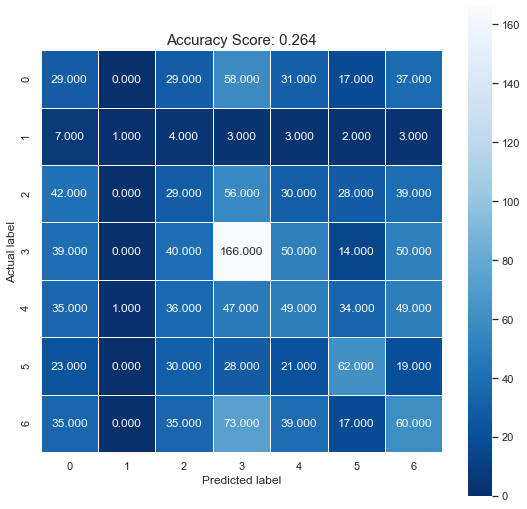

In [130]:
# YOUR CODE HERE

predictions = lm.predict(x_data_test_sub)

cm = metrics.confusion_matrix(y_data_test_sub, predictions)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [37]:
# YOUR CODE HERE

from sklearn.svm import SVC

#considered subset of the data
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_data_train_sub, y_data_train_sub)
svm_predictions = svm_model_linear.predict(x_data_test_sub)
 
# model accuracy for X_test 
accuracy = svm_model_linear.score(x_data_test_sub, y_data_test_sub)
 
accuracy


0.2806666666666667

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

Model is not really accurate as for example, the true value for 0 is (44 times) but it was predicted as 2, 3 (53 times) each.

[[ 44   5  41  46  28  12  25]
 [  5   2   5   4   3   1   3]
 [ 53   3  38  47  25  24  34]
 [ 53   1  44 167  40  22  32]
 [ 52   3  37  51  49  25  34]
 [ 18   2  40  29  10  66  18]
 [ 46   2  43  66  29  18  55]]


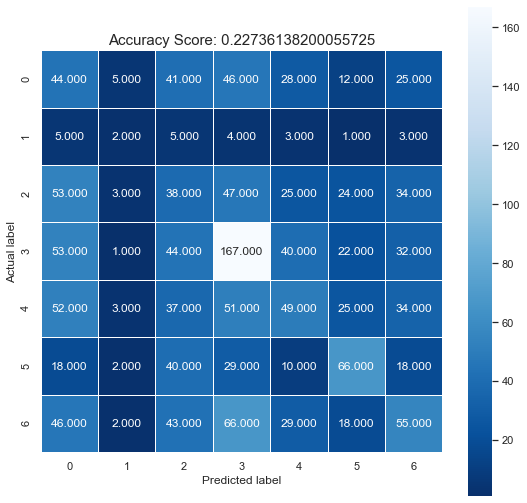

In [131]:
cm = metrics.confusion_matrix(y_data_test_sub, svm_predictions)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

[2 Marks] e. Which categories of faces seem to be most similar or least similar?
EXPLAIN HERE

For example: '3' (happy) true value is 167 and '6' (neutral) predicts happy (3) 66 times which is even higher than its true value that is (55 times) . Therefore, it would mean happy and neutral are most similar in this case. 

If we consider the same example i.e of '3' happy, we can see '1' (disgust) is predicted as happy only 4 times that makes it least similar.

[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

We can use predict_proba to determine the probability of the cases. We have already used confusion matrix that also helps us to find out where the classification has gone wrong. We may choose to increase the number of samples to improve our accuracy and plot the confusion matrix again to see the changes and compare with the old confusion matrix. Similary, predict proba is good techniuqe that gives the probability of each of the cases. (i.e. the probability that a particular data point falls into the underlying classes)

In [132]:
# YOUR CODE HERE

#Logistic Regression
yprob_lr = logreg.predict_proba(x_data_test_sub)
print("For Logistric Regression: \n",yprob_lr[-8:].round(2))

#Naive Bayes
yprob_nb = gnb.predict_proba(x_data_test_sub)
print("\nFor Naive bayes: \n",yprob_nb[-8:].round(2))


For Logistric Regression: 
 [[0.   1.  ]
 [0.02 0.98]
 [0.02 0.98]
 [0.9  0.1 ]
 [0.01 0.99]
 [0.04 0.96]
 [0.99 0.01]
 [0.55 0.45]]

For Naive bayes: 
 [[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]]


# Challenge question (required)

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[6 Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [133]:
# YOUR CODE HERE
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects

    
tsne = TSNE(random_state=123).fit_transform(d2_test_multi_dataset)

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(0.55187935, 0.46136686, '0'),
  Text(-1.7069688, -4.3158197, '1'),
  Text(-1.3694341, -10.026321, '2'),
  Text(1.2442709, 3.1727946, '3'),
  Text(-2.2478168, 8.659753, '4'),
  Text(0.012349849, -19.523876, '5'),
  Text(0.92789614, 3.9620574, '6')])

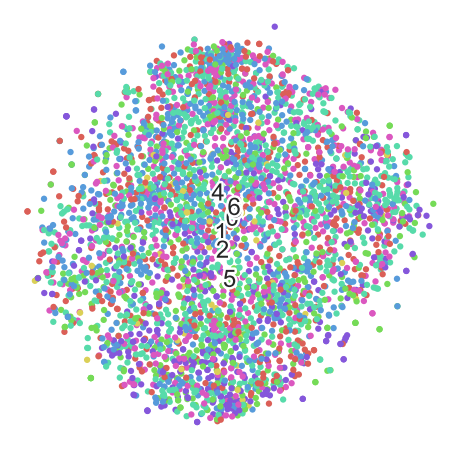

In [134]:
fashion_scatter(tsne, class_labels_test)